In [2]:
!pip install alerce

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from alerce.core import Alerce
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import viridis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from datetime import datetime

C:\Users\Acer\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Acer\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
from scipy import stats
from sklearn import datasets

In [5]:
from alerce.core import Alerce
client = Alerce()

In [6]:
!pip install psycopg2-binary

In [7]:
import psycopg2

In [8]:
import requests
url = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(url).json()['params']

In [9]:
print(params)

{'dbname': 'ztf', 'user': 'alerceread', 'host': '54.205.99.47', 'password': 'w*C*u8AXZ4e%d+zv'}


In [10]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [11]:
type(conn)

psycopg2.extensions.connection

In [12]:
query = """
SELECT table_name  FROM information_schema.tables
WHERE table_schema='alerce'
ORDER BY table_name;
"""
tables = pd.read_sql_query(query, conn)
tables.sort_values(by="table_name")

C:\Users\Acer\AppData\Local\Temp\ipykernel_12728\2807366653.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql_query(query, conn)


,table_name
0,allwise
1,dataquality
2,detection
3,feature
4,feature_version
5,gaia_ztf
6,lc_classifier
7,lc_classifier_periodic
8,lc_classifier_stochastic
9,lc_classifier_top


In [13]:
alltabs = []
for tab in sorted(tables.table_name):
    cols = pd.DataFrame()
    query = "select column_name, data_type from information_schema.columns where table_name = '%s';" % tab
    results = pd.read_sql_query(query, conn)
    results["table"] = tab
    alltabs.append(results)
dftab = pd.concat(alltabs)
pd.options.display.max_rows = 999
display(dftab[["table", "column_name", "data_type"]])
pd.options.display.max_rows = 101

C:\Users\Acer\AppData\Local\Temp\ipykernel_12728\332238241.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12728\332238241.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12728\332238241.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12728\332238241.py:5: UserWarn

,table,column_name,data_type
0,allwise,k_msig_2mass,double precision
1,allwise,ra,double precision
2,allwise,dec,double precision
3,allwise,w1mpro,double precision
4,allwise,w2mpro,double precision
5,allwise,w3mpro,double precision
6,allwise,w4mpro,double precision
7,allwise,w1sigmpro,double precision
8,allwise,w2sigmpro,double precision
9,allwise,w3sigmpro,double precision


In [14]:
import os
import glob

ruta_carpeta = "C:/Users/Acer/Desktop/ramos/5° Semestre/Astroinformática/Trabajo Grupal/datos/datos_asteroids"  # Ruta de la carpeta que contiene los archivos

archivos = glob.glob(os.path.join(ruta_carpeta, "*.txt"))

design_aster = []
magn_abs = []
prop_semi_maj_ax = []
prop_ecc = []
sin_prop_incl = []
id_familia = []

for archivo in archivos:
    with open(archivo, "r") as archivo_actual:
        lineas = archivo_actual.readlines()

        for linea in lineas:
            valores = linea.strip().split()  
            
            design_aster.append(valores[0])
            magn_abs.append(valores[1])
            prop_semi_maj_ax.append(valores[2])
            prop_ecc.append(valores[3])
            sin_prop_incl.append(valores[4])
            id_familia.append(valores[5])
 

In [15]:
import pandas as pd
data = {
    'design_aster': design_aster,
    'magn_abs': magn_abs,
    'prop_semi_maj_ax': prop_semi_maj_ax,
    'prop_ecc': prop_ecc,
    'sin_prop_incl': sin_prop_incl,
    'id_familia': id_familia
}

df = pd.DataFrame(data)
df_original = df 

df_nuevos_asteroides = df_original.groupby('id_familia').apply(lambda x: x.head(100))

df_nuevos_asteroides.reset_index(drop=True, inplace=True)

print(df_nuevos_asteroides)


     design_aster magn_abs prop_semi_maj_ax  prop_ecc sin_prop_incl id_familia
0              10     5.48         3.141802  0.135780      0.088953         10
1             100     7.68         3.094570  0.150107      0.091265         10
2             211     7.98         3.044257  0.150752      0.085849         10
3             108     8.03         3.220964  0.106152      0.083607         10
4             159     8.35         3.104241  0.117101      0.089714         10
...           ...      ...              ...       ...           ...        ...
8503       279647    15.66         3.054156  0.188017      0.290498         96
8504       236661    15.69         3.035786  0.186358      0.285049         96
8505       273238    15.71         3.065695  0.183715      0.287201         96
8506       481461    15.81         3.067768  0.182918      0.282538         96
8507       342965    15.85         3.044134  0.186264      0.287015         96

[8508 rows x 6 columns]


IndexError: index 86 is out of bounds for axis 0 with size 86

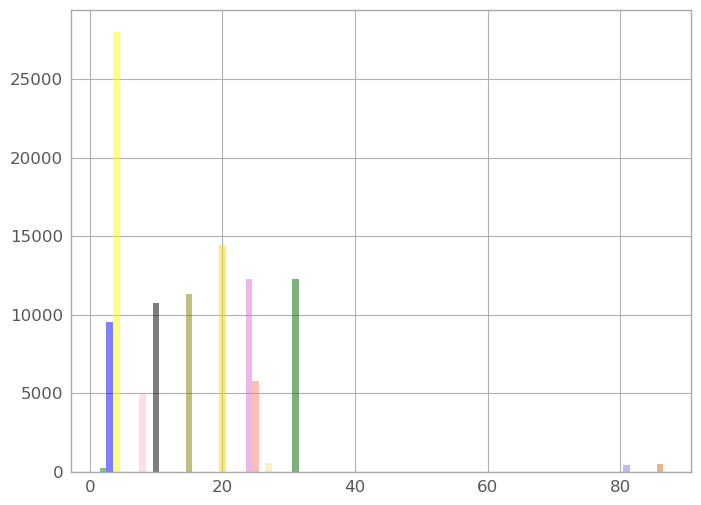

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Obtén los números de familia (ejemplo)
familias = df['id_familia'].astype(float)

# Genera una paleta de colores con los colores proporcionados
colores = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'black',
           'white', 'cyan', 'magenta', 'lime', 'olive', 'maroon', 'navy', 'teal', 'silver', 'gold',
           'indigo', 'violet', 'coral', 'orchid', 'salmon', 'turquoise', 'khaki', 'sienna', 'crimson',
           'slateblue', 'darkgreen', 'darkorange', 'darkviolet', 'dodgerblue', 'forestgreen', 'hotpink',
           'indianred', 'lightblue', 'lightgreen', 'mediumblue', 'mediumorchid', 'mediumseagreen',
           'mediumslateblue', 'orangered', 'royalblue', 'seagreen', 'skyblue', 'tomato', 'yellowgreen',
           'darkred', 'darkcyan', 'darkslategray', 'limegreen', 'mediumturquoise', 'peru', 'rosybrown',
           'darkkhaki', 'lightcoral', 'mediumspringgreen', 'midnightblue', 'saddlebrown', 'dimgrey',
           'mediumvioletred', 'olivedrab', 'palevioletred', 'cadetblue', 'darkgoldenrod', 'firebrick',
           'forestgreen', 'darkorchid', 'crimson', 'darkolivegreen', 'lightseagreen', 'steelblue',
           'mediumaquamarine', 'indianred', 'chocolate', 'mediumslateblue', 'darkseagreen', 'lime',
           'mediumpurple', 'darkmagenta', 'darkslateblue', 'springgreen', 'darkturquoise', 'chocolate'])


# Crear un histograma para cada familia con un color diferente
for familia in range(len(familias)):
    familia_indices = np.where(familias == familia)[0]
    if len(familia_indices) > 0:
        plt.hist(familias[familia_indices], bins='auto', color=colores[familia-1], alpha=0.5)

# Establecer los límites del eje x

# Mostrar los histogramas
plt.show()


In [19]:
print(df['id_familia'].values)

['10811' '10811' '10811' ... '96' '96' '96']


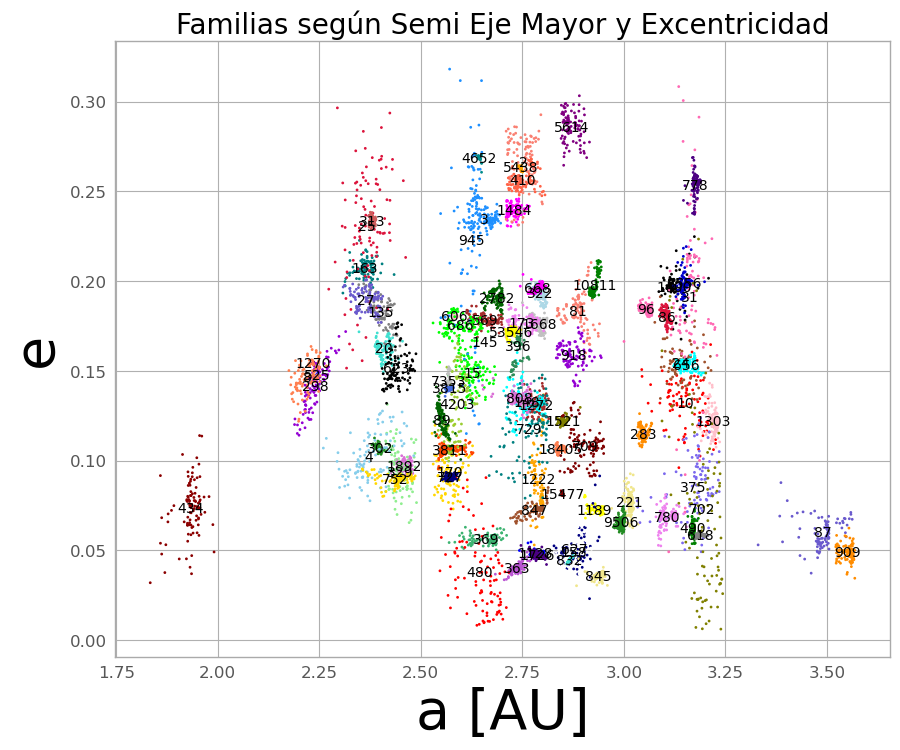

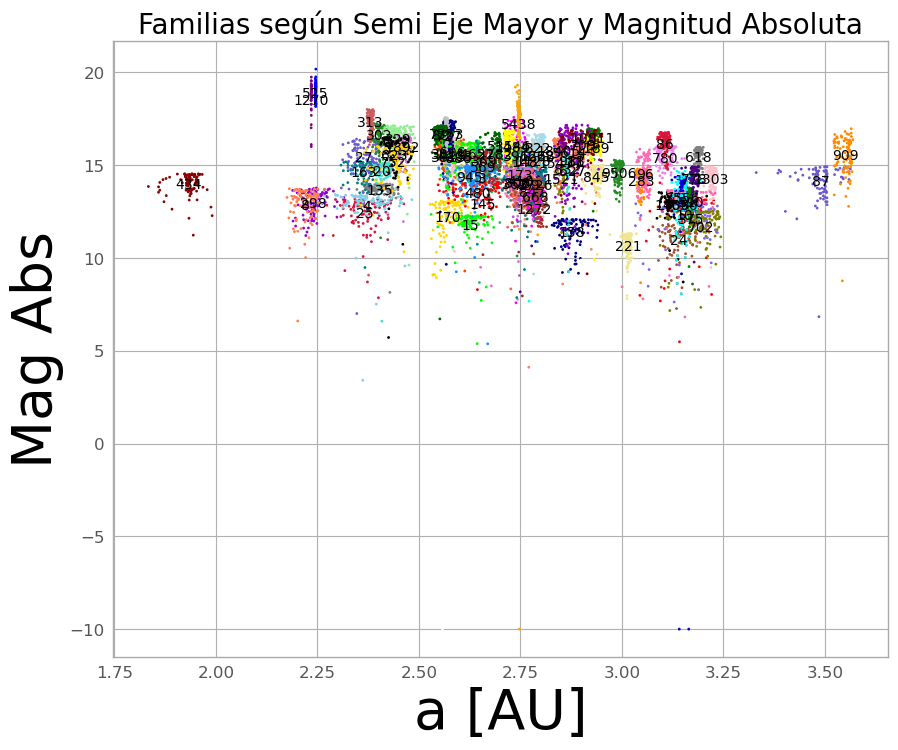

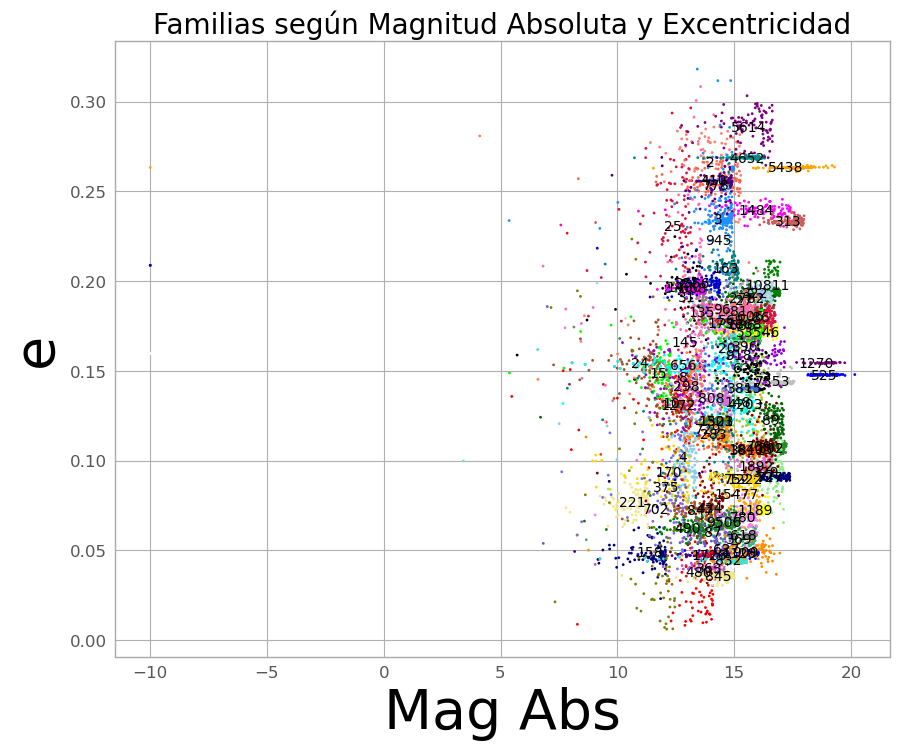

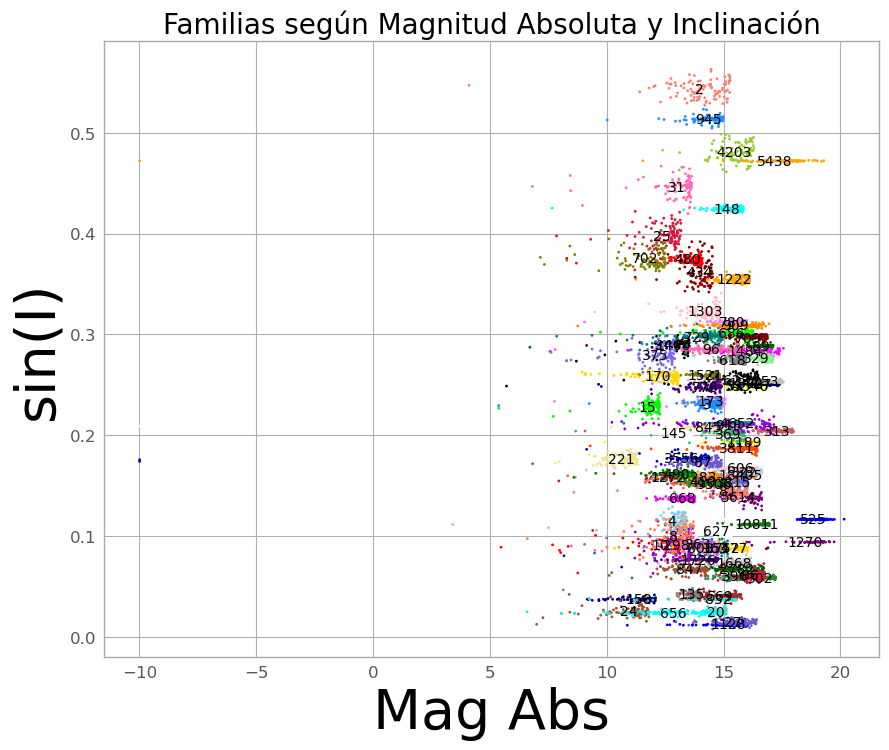

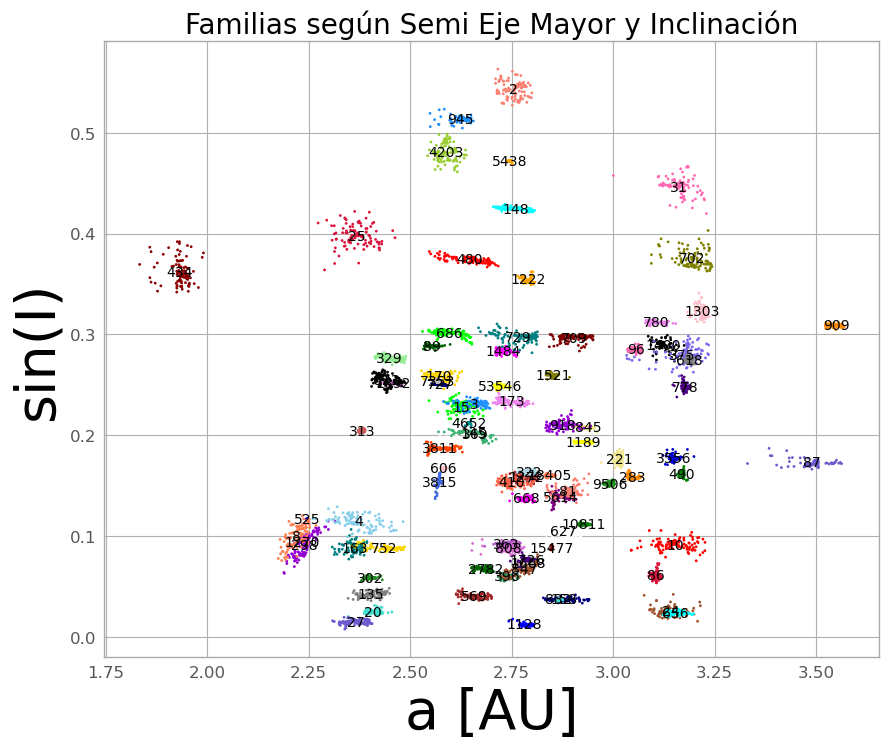

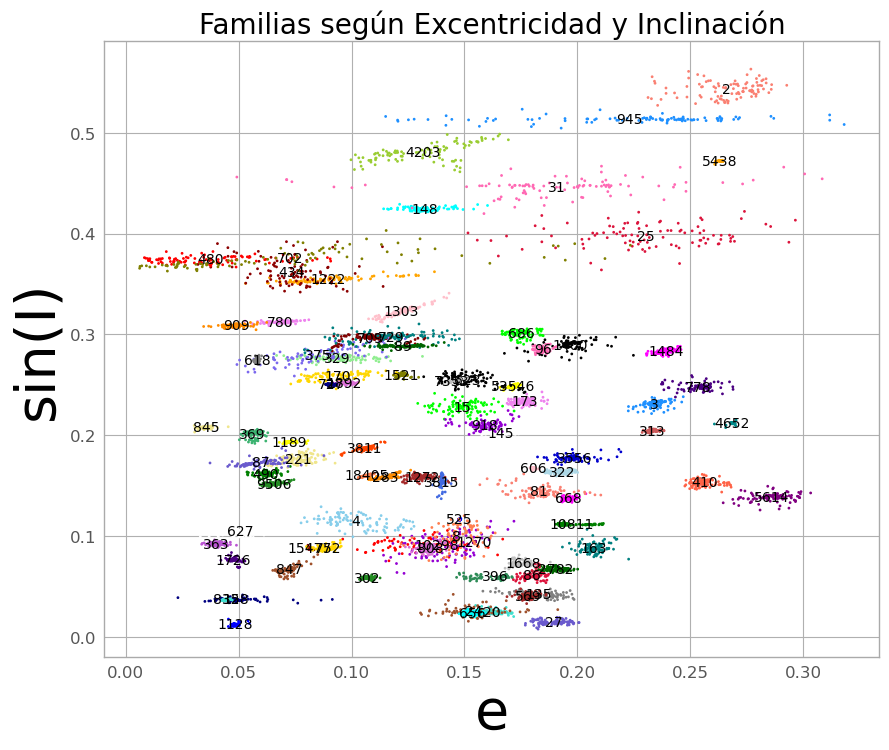

In [38]:
df_nuevos_asteroides['magn_abs'] = df_nuevos_asteroides['magn_abs'].astype(float)
df_nuevos_asteroides['prop_semi_maj_ax'] = df_nuevos_asteroides['prop_semi_maj_ax'].astype(float)
df_nuevos_asteroides['prop_ecc'] = df_nuevos_asteroides['prop_ecc'].astype(float)
df_nuevos_asteroides['sin_prop_incl'] = df_nuevos_asteroides['sin_prop_incl'].astype(float)



familias_unicas = np.unique(df_nuevos_asteroides['id_familia'])
familia_colores = {}
colores = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'black', 
           'white', 'cyan', 'magenta', 'lime', 'olive', 'maroon', 'navy', 'teal', 'silver', 'gold',
           'indigo', 'violet', 'coral', 'orchid', 'salmon', 'turquoise', 'khaki', 'sienna', 'crimson',
           'slateblue', 'darkgreen', 'darkorange', 'darkviolet', 'dodgerblue', 'forestgreen', 'hotpink',
           'indianred', 'lightblue', 'lightgreen', 'mediumblue', 'mediumorchid', 'mediumseagreen',
           'mediumslateblue', 'orangered', 'royalblue', 'seagreen', 'skyblue', 'tomato', 'yellowgreen',
           'darkred', 'darkcyan']

for i, familia in enumerate(familias_unicas):
    familia_colores[familia] = colores[i % len(colores)]


df_2 = df_nuevos_asteroides.copy()

df_2.rename(columns={'magn_abs': 'Mag Abs'}, inplace=True)
df_2.rename(columns={'prop_semi_maj_ax': 'a'}, inplace=True)
df_2.rename(columns={'prop_ecc': 'e'}, inplace=True)
df_2.rename(columns={'sin_prop_incl': 'sin(I)'}, inplace=True)

colors = df_nuevos_asteroides['id_familia'].map(familia_colores)

s1= 'Mag Abs'
s2 = 'a'
s3 = 'e'
s4 = 'sin(I)'

l1= 'Magnitud Absoluta'
l2 = 'Semi Eje Mayor'
l3 = 'Excentricidad'
l4 = 'Inclinación'


def grafico(string1, string2, le1, le2):
    ds = df_2
    plt.figure(figsize=(10, 8))
    plt.scatter(ds[string1], ds[string2], s=1, c=colors)

    for familia in familias_unicas:
        df_familia = ds[ds['id_familia'] == familia]
        x_center = df_familia[string1].mean()
        y_center = df_familia[string2].mean()
        plt.text(x_center, y_center, familia, ha='center', va='center', fontsize=10)

    if string1 == 'a':
        plt.xlabel(str(string1) + ' [AU]', fontsize=40)
        plt.ylabel(str(string2), fontsize=40)
    elif string2 == 'a':
        plt.xlabel(str(string1), fontsize=40)
        plt.ylabel(str(string2) + ' [AU]', fontsize=40)
    else:
        plt.ylabel(str(string2), fontsize=40)
        plt.xlabel(str(string1), fontsize=40)
    plt.title('Familias según ' + str(le1) + ' y ' + str(le2), fontsize=20)
    plt.show()
    

nombres = ['Pallas', 'Juno', 'Vesta', 'Flora', 'Hygiea', 'Eunomia', 'Massalia', 'Themis', 'Phocaea', 'Euterpe', 
           'Euphrosyne', 'Terpsichore', 'Semele', 'Sylvia', 'Julia', 'Aegle', 'Hertha', 'Adeona', 'Gallia', 
           'Koronis', 'Erigone', 'Maria', 'Ino', 'Eos', 'Emma', 'Baptistina', 'Clarissa', 'Chaldaea', 'Phaeo', 
           'Svea', 'Padua', 'Aeria', 'Ursula', 'Aeolia', 'Chloris', 'Hungaria', 'Hansa', 'Veritas', 'Adelaide', 
           'Misa', 'Brangane', 'Elfriede', 'Chimaera', 'Charis', 'Beagle', 'Dora', 'Gersuind', 'Alauda', 
           'Fringilla', 'Nipponia', 'Watsonia', 'Sulamitis', 'Theobalda', 'Armenia', 'Merxia', 'Karin', 
           'Naema', 'Agnia', 'Ulla', 'Itha', 'Barcelona', 'Astrid', 'Terentia', 'Tina', 'Datura', 'Gefion', 
           'Luthera', 'Tirela', 'Postrema', 'Seinajoki', 'Hanna', 'Hoffmeister', 'Lucienne', 'Leonidas',
           'Lixiaohua', 'Karma', 'Konig', 'Brucato', 'Iannini', 'Lorre', 'Yakovlev', 'Kazuya', 'Telramund', 
           'Lau', '(1999 CG1)', '(1993 FY12)', '(2000 BY6)']

numeros = [2, 3, 4, 8, 10, 15, 20, 24, 25, 27, 31, 81, 86, 87, 89, 96, 135, 145, 148, 158, 163,
           170, 173, 221, 283, 298, 302, 313, 322, 329, 363, 369, 375, 396, 410, 434, 480, 490,
           525, 569, 606, 618, 623, 627, 656, 668, 686, 702, 709, 727, 729, 752, 778, 780, 808, 
           832, 845, 847, 909, 918, 945, 1128, 1189, 1222, 1270, 1272, 1303, 1400, 1484, 1521,
           1668, 1726, 1892, 2782, 3556, 3811, 3815, 4203, 4652, 5438, 5614, 7353, 9506, 10811, 
           15477, 18405, 53546]
numeros = list(map(str, numeros))
grafico(s2, s3, l2, l3)
grafico(s2, s1, l2, l1)
grafico(s1, s3, l1, l3)
grafico(s1, s4, l1, l4)
grafico(s2, s4, l2, l4)
grafico(s3, s4, l3, l4)

In [39]:
familias_id = df['id_familia'] 
familias_id = [str(elemento) for elemento in familias_id]
familias_id

['10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',
 '10811',


In [48]:
indices = []
familia = []
for id_familia in familias_id:
    if id_familia in numeros:
        indice = (numeros).index(id_familia)
        familia = (nombres[indice])
        indices += [indice]
        familias += [familia]
print(familias)        

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U3')) -> None

In [47]:
df_cp = df.copy()
magnitudes = (df_cp['id_familia'])[indices]


83    10811
83    10811
83    10811
83    10811
83    10811
      ...  
15    10811
15    10811
15    10811
15    10811
15    10811
Name: id_familia, Length: 303417, dtype: object

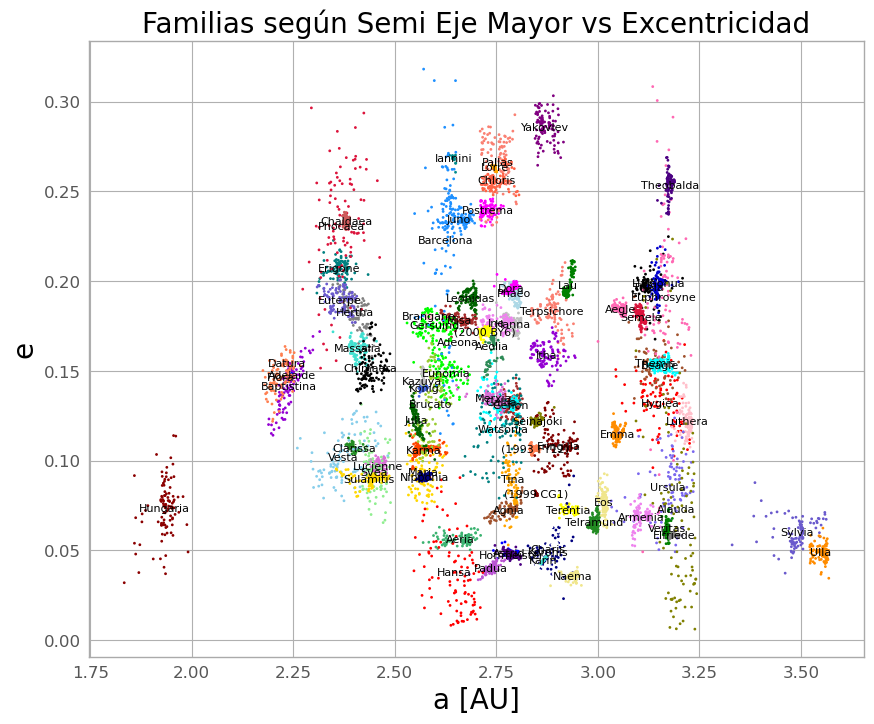

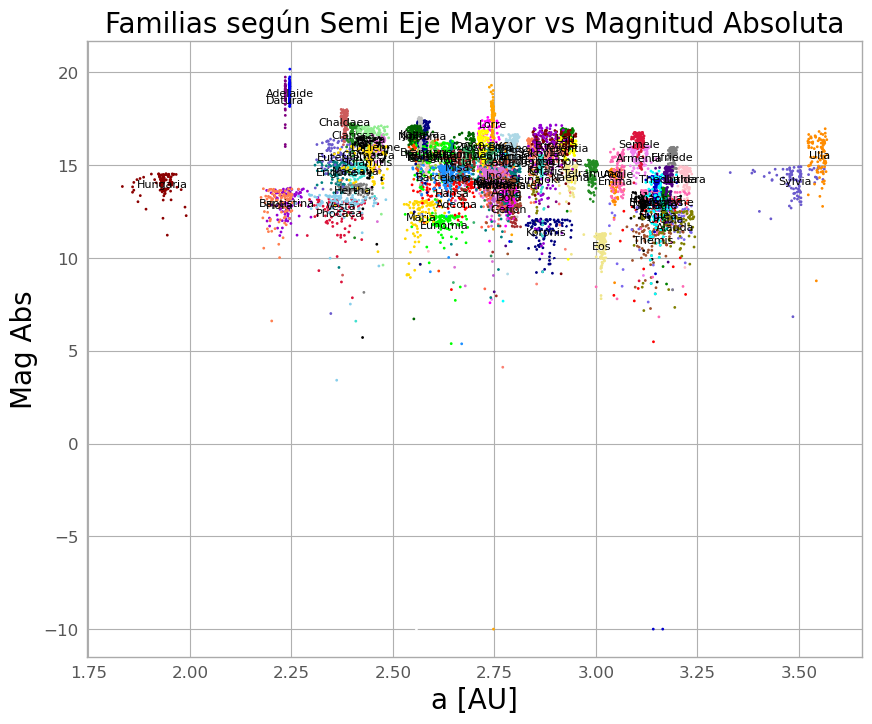

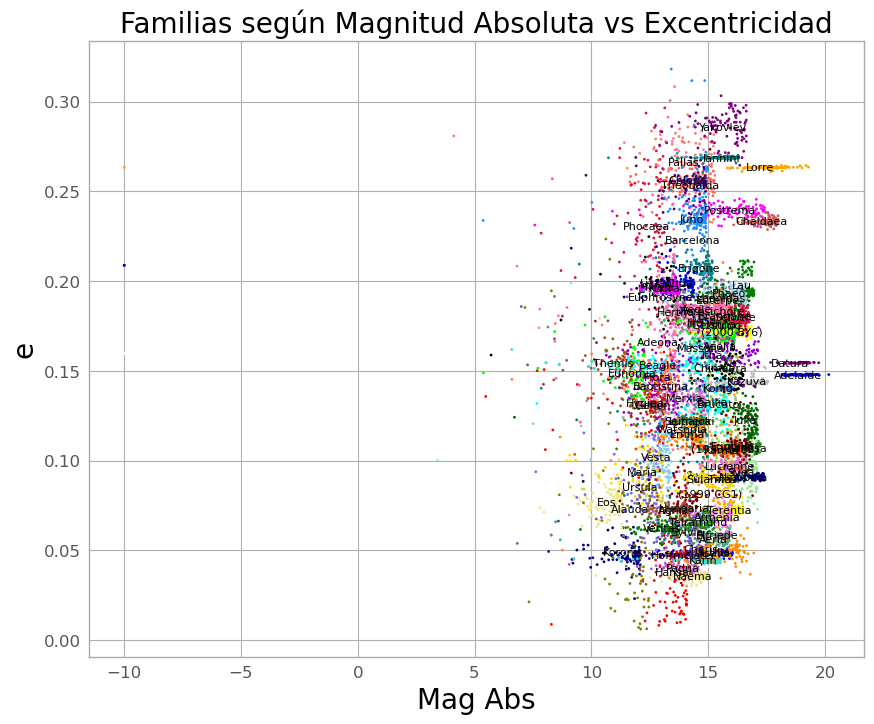

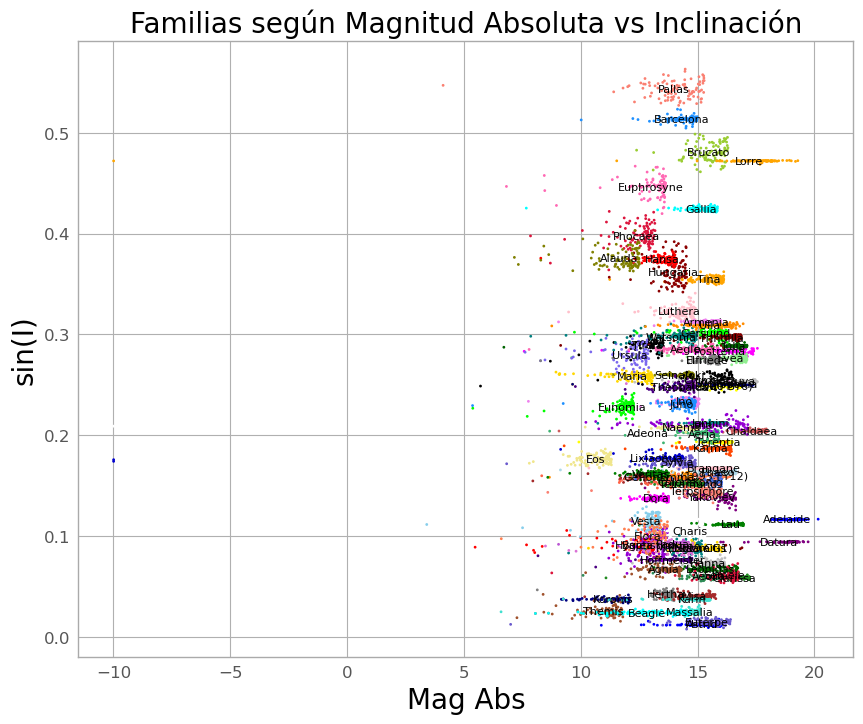

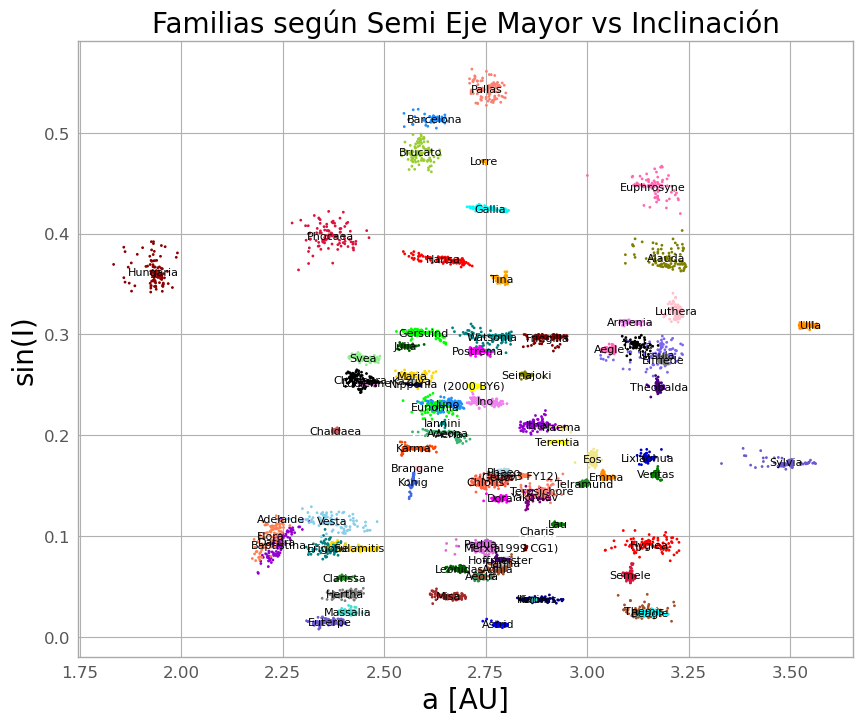

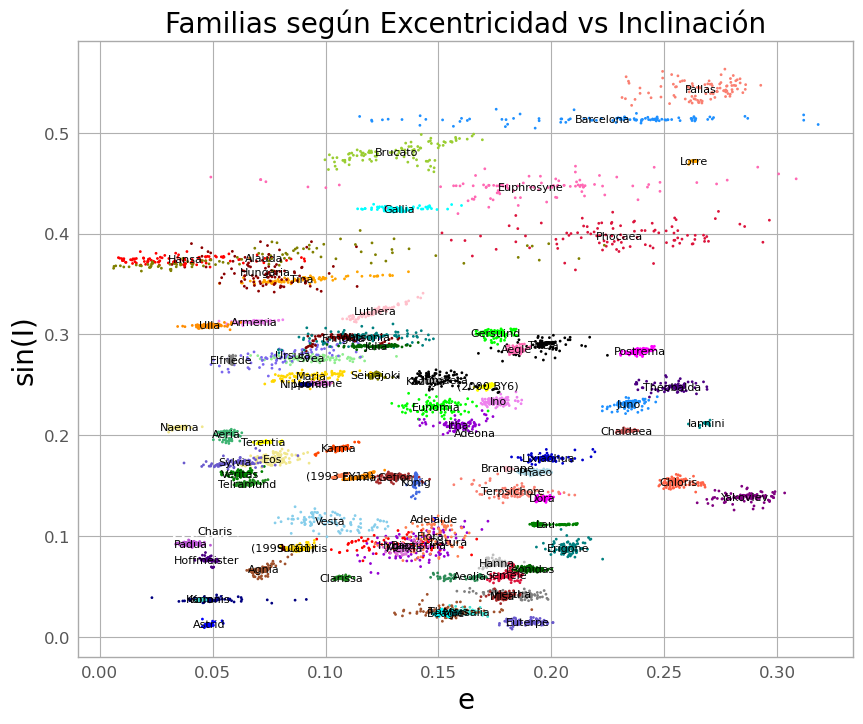

In [18]:
import matplotlib.pyplot as plt

def grafico2(string1, string2, le1, le2):
    ds = df_2
    plt.figure(figsize=(10, 8))
    plt.scatter(ds[string1], ds[string2], s=1, c=colors)

    for familia in familias_unicas:
        df_familia = ds[ds['id_familia'] == familia]
        x_center = df_familia[string1].mean()
        y_center = df_familia[string2].mean()
        
        if familia in numeros:
            nombre = nombres[numeros.index(familia)]
            plt.text(x_center, y_center, nombre, ha='center', va='center', fontsize=8)
        else:
            plt.text(x_center, y_center, familia, ha='center', va='center', fontsize=8)

    if string1 == 'a':
        plt.xlabel(str(string1) + ' [AU]', fontsize=20)
        plt.ylabel(str(string2), fontsize=20)
    elif string2 == 'a':
        plt.xlabel(str(string1), fontsize=20)
        plt.ylabel(str(string2) + ' [AU]', fontsize=20)
    else:
        plt.ylabel(str(string2), fontsize=20)
        plt.xlabel(str(string1), fontsize=20)
    plt.title('Familias según ' + str(le1) + ' vs ' + str(le2), fontsize=20)
    plt.show()
grafico2(s2, s3, l2, l3)
grafico2(s2, s1, l2, l1)
grafico2(s1, s3, l1, l3)
grafico2(s1, s4, l1, l4)
grafico2(s2, s4, l2, l4)
grafico2(s3, s4, l3, l4)

In [19]:
!pip install umap-learn

In [20]:
import umap as umap

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
columnas1 = df_2
astrodata = columnas1
astrodata = astrodata.drop("design_aster", axis=1)
astrodata

,Mag Abs,a,e,sin(I),id_familia
0,5.48,3.141802,0.135780,0.088953,10
1,7.68,3.094570,0.150107,0.091265,10
2,7.98,3.044257,0.150752,0.085849,10
3,8.03,3.220964,0.106152,0.083607,10
4,8.35,3.104241,0.117101,0.089714,10
...,...,...,...,...,...
8503,15.66,3.054156,0.188017,0.290498,96
8504,15.69,3.035786,0.186358,0.285049,96
8505,15.71,3.065695,0.183715,0.287201,96
8506,15.81,3.067768,0.182918,0.282538,96


In [22]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()
u = np.array(astrodata.drop(columns = ['id_familia']))
scaler = StandardScaler()
u_scaled = scaler.fit_transform(u)

C:\Users\Acer\anaconda3\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Acer\anaconda3\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Acer\anaconda3\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword 

In [23]:
%%time
concatenate2 = df_2
categ = concatenate2['id_familia']
astro_umap = reducer.fit_transform(u_scaled.data)
astro_umap.shape

CPU times: total: 56.2 s
Wall time: 54.7 s


(8508, 2)

In [24]:
categ1 = np.unique(categ)
nuevo_arreglo = [nombres[numeros.index(elem)] if elem in numeros else elem for elem in categ1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


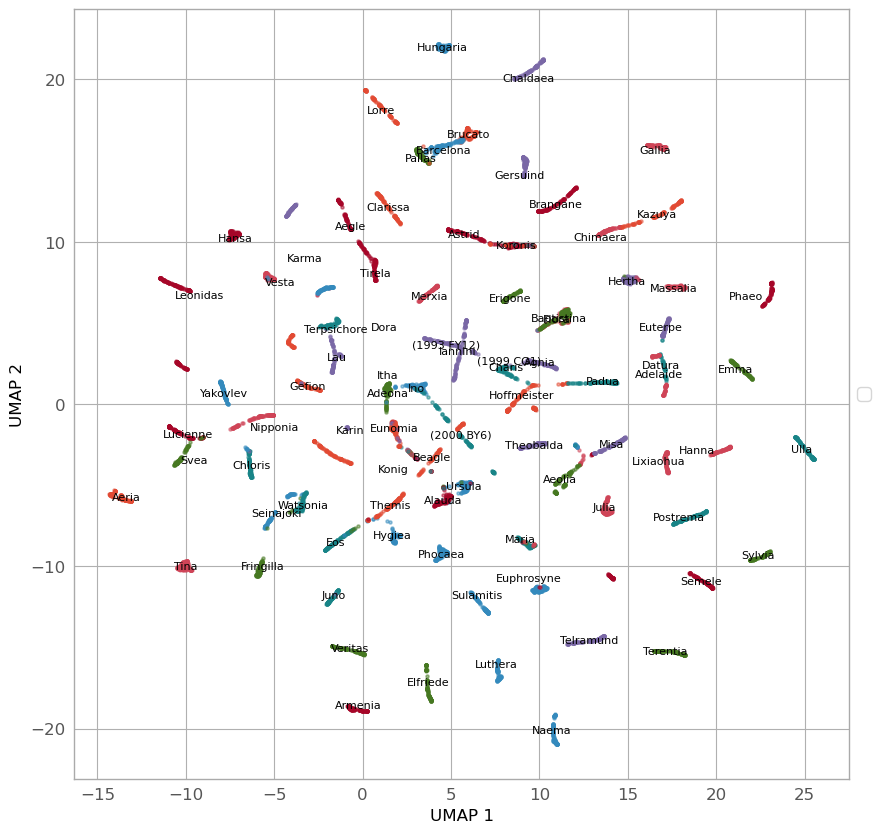

In [25]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True)

for i in range(len(categ1)):
    clase = categ1[i]
    mask = (categ == clase)
    ax.scatter(astro_umap[mask][:, 0], astro_umap[mask][:, 1], alpha=0.5, s=5)
    ax.annotate(nuevo_arreglo[i], (np.mean(astro_umap[mask][:, 0]), 
                                   np.mean(astro_umap[mask][:, 1])), fontsize=8, 
                ha='center', va='center')

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


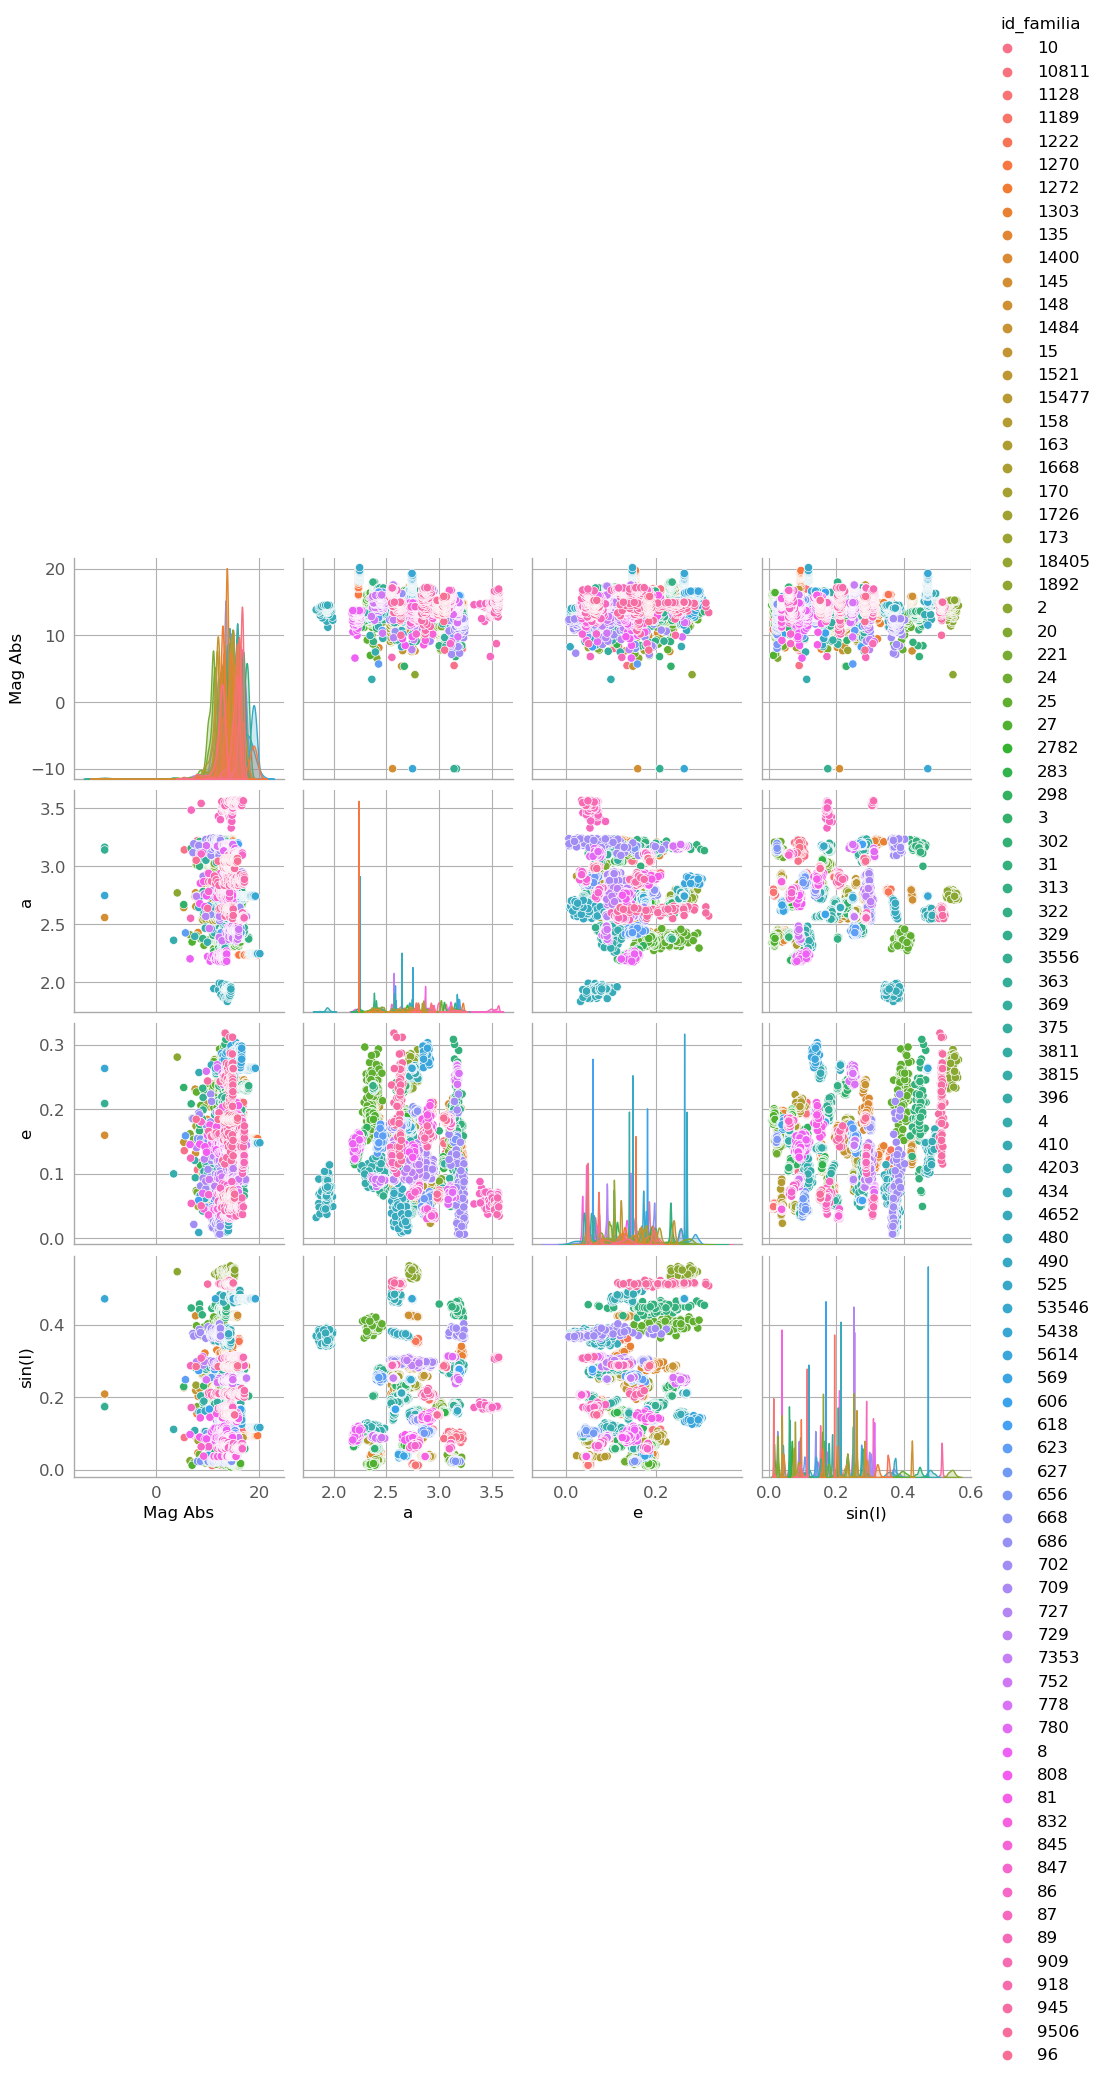

In [26]:
import seaborn as sn
sn.pairplot(astrodata, hue='id_familia')
plt.yticks(fontsize=8)

# Mostrar el gráfico
plt.show()

In [27]:
data = {
    'design_aster': design_aster,
    'magnitud_absoluta': magn_abs,
    'semieje_mayor': prop_semi_maj_ax,
    'excentricidad': prop_ecc,
    'seno_inclinacion': sin_prop_incl,
    'id_familias': id_familia
}

df_ast = pd.DataFrame(data)

cantidad de objetos:  2


C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\538380783.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ss1 = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\538380783.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)


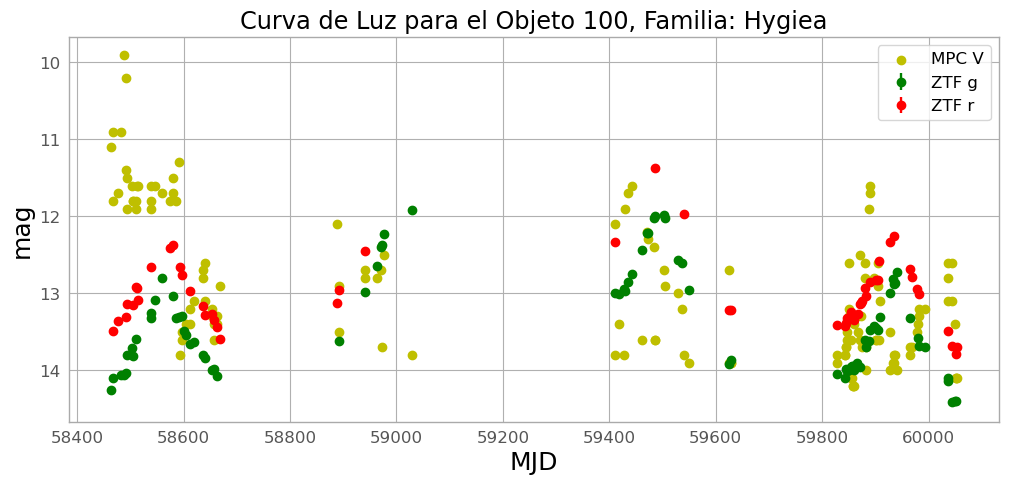

In [28]:
s = 1
O = np.linspace(0, s-1, num=s, dtype=int).tolist()
n = 2
print('cantidad de objetos: ',s*n)
for i in O:
    query='''
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr in (%s)
    AND ssdistnr >= 0
    ORDER BY ssnamenr
    ''' % ",".join(["'%s'" % name for name in (columnas1['design_aster'])[n*i:n*(i+1)]])#design_aster[n*i:n*(i+1)]])
    ss1 = pd.read_sql_query(query, conn)

    valores_unicos = ss1['ssnamenr']
    arr = np.array(valores_unicos)
    unique_values, counts = np.unique(arr, return_counts=True)
    valores = unique_values[counts > 100]
    if len(valores)>0:
        for j in range(len(valores)):
            valor = valores[j]
            columna_candids = ss1.loc[ss1['ssnamenr'] == valor, 'candid']
            query='''
            SELECT *
            FROM detection
            WHERE
            candid in (%s)
            ''' % ",".join(["'%s'" % candid for candid in columna_candids])
            detection = pd.read_sql_query(query, conn)
            dets = detection
            ss = ss1
            colors = {1: 'g', 2: 'r',3:'orange'}
            fig, ax = plt.subplots(figsize=(12,5))

            for fid in dets.fid.unique():
              mask = (dets.fid == fid)
              ax.errorbar(dets.loc[mask].mjd, dets.loc[mask].magpsf, 
                          yerr=dets.loc[mask].sigmapsf, c=colors[fid], label = "ZTF %s" % colors[fid], fmt='o')
            ax.scatter(dets.mjd, ss.loc[dets.index].ssmagnr, c='y', label='MPC V')
            ax.set_title('Curva de Luz para el Objeto '+ str(valor)+ ', Familia: '+str(nuevo_arreglo[j])) #,cuenta[])
            ax.set_ylim(ax.get_ylim()[::-1])
            ax.set_xlabel("MJD", fontsize=18)
            ax.set_ylabel("mag", fontsize=18)
            ax.legend()

In [29]:

data = {
    'design_aster': design_aster,
    'magn_abs': magn_abs,
    'prop_semi_maj_ax': prop_semi_maj_ax,
    'prop_ecc': prop_ecc,
    'sin_prop_incl': sin_prop_incl,
    'id_familia': id_familia
}

df = pd.DataFrame(data)
df_original = df 

df_nuevos_asteroides_2 = df_original.groupby('id_familia').apply(lambda x: x.head(2))

df_3 = df_nuevos_asteroides_2.copy()

df_3.rename(columns={'magn_abs': 'Mag Abs'}, inplace=True)
df_3.rename(columns={'prop_semi_maj_ax': 'a'}, inplace=True)
df_3.rename(columns={'prop_ecc': 'e'}, inplace=True)
df_3.rename(columns={'sin_prop_incl': 'sin(I)'}, inplace=True)

df_3

design_aster Mag Abs         a         e    sin(I)  \
id_familia                                                             
10         574              10    5.48  3.141802  0.135780  0.088953   
           575             100    7.68  3.094570  0.150107  0.091265   
10811      0             10811   12.51  2.929198  0.194354  0.110815   
           1             84957   14.74  2.927062  0.191418  0.112621   
1128       11290          1128   10.88  2.787505  0.048007  0.011484   
...                        ...     ...       ...       ...       ...   
945        299845         7749   12.23  2.631612  0.194513  0.514212   
9506       302905         9506   13.03  2.993270  0.066577  0.153663   
           302906        17159   13.16  2.986190  0.063057  0.151189   
96         303246           96    7.79  3.052067  0.184447  0.285137   
           303247        24388   12.06  3.044786  0.184302  0.284838   

                  id_familia  
id_familia                    
10         574            10  
           575            10  
10811      0           10811  
           1           10811  
1128       11290        1128  
...                      ...  
945        299845        945  
9506       302905       9506  
           302906       9506  
96         303246         96  
           303247         96  

[174 rows x 6 columns]

In [30]:
p = []
aster = []
from scipy.signal import find_peaks
s = 1
O = np.linspace(0, s-1, num=s, dtype=int).tolist()
n = len(df_3)
print('cantidad de objetos: ',s*n)
for i in O:
    query='''
    SELECT *
    FROM ss_ztf
    WHERE
    ssnamenr in (%s)
    AND ssdistnr >= 0
    ORDER BY ssnamenr
    ''' % ",".join(["'%s'" % name for name in (df_3['design_aster'])[n*i:n*(i+1)]])
    ss1 = pd.read_sql_query(query, conn)

    valores_unicos = ss1['ssnamenr']
    arr = np.array(valores_unicos)
    unique_values, counts = np.unique(arr, return_counts=True)
    valores = unique_values[counts > 14]
    for j in range(len(valores)):
        
        valor = valores[j]
        aster += [valor]
        columna_candids = ss1.loc[ss1['ssnamenr'] == valor, 'candid']
        query='''
        SELECT *
        FROM detection
        WHERE
        candid in (%s)
        ''' % ",".join(["'%s'" % candid for candid in columna_candids])
        #ir de 1000 en 1000 (para que no me mate el timeout, para cancelacion de query)
        detection = pd.read_sql_query(query, conn)
        dets = detection
        ss = ss1
        colors = {1: 'g', 2: 'r',3:'orange'}
        #print("Asteroide", valor,'Familia: ', nuevo_arreglo[j])
        for fid in dets.fid.unique():
            mask = (dets.fid == fid)
            mjd = dets.loc[mask, 'mjd']
            mag = dets.loc[mask, 'magpsf']

            fft = np.fft.fft(mag)
            frecuencias = np.fft.fftfreq(len(mag), d=np.mean(np.diff(mjd))) 

            picos, _ = find_peaks(np.abs(fft))
            periodos = 1 / frecuencias[picos]

            periodos_ordenados = np.sort(periodos)
            if fid == 2:
                if len(periodos_ordenados) > 1:
                    periodo_dominante = periodos_ordenados[1]  # El índice 0 suele ser el ruido
                    p += [periodo_dominante]
                else:
                    periodo_dominante = None
                    p += [periodo_dominante]
        


cantidad de objetos:  174


C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ss1 = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: User

C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508

C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508

C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35

C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35

C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35

C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1508\2341561695.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  detection = pd.read_sql_query(query, conn)
C:\Users\Acer\anaconda3\lib\site-packages\numpy\core\fromnumeric

In [31]:
#p = [abs(x) for x in p]
print(aster, p)

['10', '100', '105', '10811', '1086', '1103', '1128', '1189', '11911', '11939', '1222', '1270', '130', '1303', '1308', '13290', '135', '13544', '13977', '1403', '145', '148', '1484', '1547', '15477', '15777', '158', '159782', '1609', '1618', '163', '1668', '167', '171', '17159', '173', '1730', '1734', '1795', '18405', '1892', '19585', '20', '201', '20607', '208', '21653', '2169', '221', '22101', '2354', '24', '24388', '25', '255', '2560', '2680', '272', '283', '2946', '29623', '298', '29903', '3014', '302', '308', '31', '313', '322', '329', '3324', '3369', '3432', '3453', '363', '364', '36743', '369', '375', '3811', '3815', '384', '387', '3889', '396', '3985', '4036', '404', '40413', '410', '4105', '41448', '4203', '4208', '42710', '434', '4461', '4652', '472', '4793', '480', '490', '4950', '500', '5222', '525', '53546', '5438', '569', '579', '60042', '606', '618', '623', '627', '63', '660', '665', '66765', '6793', '686', '702', '709', '72019', '727', '729', '7353', '752', '7650', '772

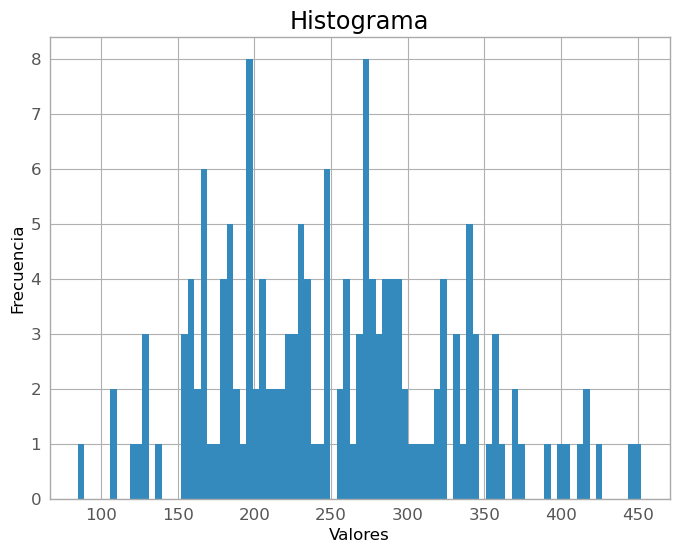

In [32]:
#tomando 2 objetos por familia, mostramos a continuación los períodos para cada
#uno de ellos.
p = [x for x in p if x is not None]
p = [abs(x) for x in p]

plt.hist(p, bins=87)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma')

# Mostrar el histograma
plt.show()

In [33]:
design_aster1 = df_3['design_aster']
mask = np.isin(design_aster1, aster)

# Crear una nueva columna 'nueva_columna' en df y asignar los períodos de p solo para los nombres en aster
df_3.loc[mask, 'nueva_columna'] = np.array(p)[np.isin(aster, design_aster1)]

# Imprimir el DataFrame actualizado
df_3

IndexError: boolean index did not match indexed array along dimension 0; dimension is 159 but corresponding boolean dimension is 160

In [ ]:
df = astrodata  # Aquí debes proporcionar tus datos y columnas reales
df_filtrado = df
df_filtrado

In [ ]:
X_filtrado = df_filtrado.drop(columns=['id_familia'])
y_filtrado = df_filtrado['id_familia']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_filtrado, y_filtrado, test_size=0.3, random_state=42)

In [ ]:
#Ahora definimos un Random Forest, que según la literatura es más preciso
#a la hora de clasificar.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
# Crear una instancia del clasificador Random Forest
rfc = RandomForestClassifier(random_state=123)

rfc.fit(X_train_mod, y_train_mod)
y_pred = rfc.predict(X_test_mod)
y_pred_proba = rfc.predict_proba(X_test_mod)

accuracy = accuracy_score(y_test_mod, y_pred)
precision = precision_score(y_test_mod, y_pred, average='weighted')
recall = recall_score(y_test_mod, y_pred, average='weighted')
f1 = f1_score(y_test_mod, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_mod, y_pred_proba, multi_class='ovr')

print("Random Forest:")
print("=====================")
print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("_____________________")

In [ ]:
import seaborn as sns
df = pd.DataFrame(X_train_mod)  # Reemplaza con tus datos de entrenamiento o prueba

# Calcular la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(9,5))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot_kws={'size':30})
plt.title('Matriz de Correlación',fontsize=30)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test_mod)
confusion_matrix = confusion_matrix(y_test_mod, y_pred, labels=labels)

n,s = 27,43 
selected_classes = list(range(n, n+s)) 
submatrix = confusion_matrix[selected_classes][:, selected_classes]


plt.figure(figsize=(15, 10))
sns.heatmap(submatrix, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize": 10})
plt.xlabel('Predicho',fontsize=30)
plt.ylabel('Actual',fontsize=30)
plt.title('Matriz de confusión: Random Forest',fontsize=30)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

train_scores, val_scores = [], []
cv = 5  # Número de pliegues de la validación cruzada

for i in range(cv):
    rfc.fit(X_train_mod, y_train_mod)  # Ajustar el modelo en el conjunto de entrenamiento
    train_score = rfc.score(X_train_mod, y_train_mod)  # Puntuación en el conjunto de entrenamiento
    val_score = np.mean(cross_val_score(rfc, X_train_mod, y_train_mod, cv=cv))  # Puntuación de validación cruzada
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Graficar los resultados de validación cruzada y entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(range(1, cv+1), train_scores, marker='o', label='Entrenamiento')
plt.plot(range(1, cv+1), val_scores, marker='o', label='Validación cruzada')
plt.xlabel('Pliegues')
plt.ylabel('Precisión')
plt.title('Puntuaciones de validación cruzada vs Entrenamiento - Random Forest')
plt.legend()
plt.xticks(range(1, cv+1))
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=123)

parameters_dt = {'max_depth': [None, 3, 5]}
grid_search_dt = GridSearchCV(tree_model, parameters_dt, cv=3, scoring='accuracy')
grid_search_dt.fit(X_train_mod, y_train_mod)

best_params_dec_t = grid_search_dt.best_params_
best_score_dec_t = grid_search_dt.best_score_

print("Best Parameters:", best_params_dec_t)
print("Best Score:", best_score_dec_t)

In [ ]:
dtc = tree_model
train_scores, val_scores = [], []
cv = 5  # Número de pliegues de la validación cruzada

for i in range(cv):
    dtc.fit(X_train_mod, y_train_mod)  # Ajustar el modelo en el conjunto de entrenamiento
    train_score = dtc.score(X_train_mod, y_train_mod)  # Puntuación en el conjunto de entrenamiento
    val_score = np.mean(cross_val_score(dtc, X_train_mod, y_train_mod, cv=cv))  # Puntuación de validación cruzada
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Graficar los resultados de validación cruzada y entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(range(1, cv+1), train_scores, marker='o', label='Entrenamiento')
plt.plot(range(1, cv+1), val_scores, marker='o', label='Validación cruzada')
plt.xlabel('Pliegues')
plt.ylabel('Precisión')
plt.title('Puntuaciones de validación cruzada vs Entrenamiento - Árbol de Decisión')
plt.legend()
plt.xticks(range(1, cv+1))
plt.show()

In [ ]:
rfc1 = tree_model

rfc1.fit(X_train_mod, y_train_mod)
y_pred1 = rfc1.predict(X_test_mod)
y_pred_proba1 = rfc1.predict_proba(X_test_mod)

accuracy1 = accuracy_score(y_test_mod, y_pred1)
precision1 = precision_score(y_test_mod, y_pred1, average='weighted')
recall1 = recall_score(y_test_mod, y_pred1, average='weighted')
f11 = f1_score(y_test_mod, y_pred1, average='weighted')
roc_auc1 = roc_auc_score(y_test_mod, y_pred_proba1, multi_class='ovr')

print("Decision Tree:")
print("=====================")
print(f"Accuracy Score: {accuracy1:.2f}")
print(f"Precision Score: {precision1:.2f}")
print(f"Recall Score: {recall1:.2f}")
print(f"F1 Score: {f11:.2f}")
print(f"ROC AUC Score: {roc_auc1:.2f}")
print("___________________")

In [ ]:
from sklearn.preprocessing import LabelBinarizer

classifier = tree_model
y_score = classifier.fit(X_train_mod, y_train_mod).predict_proba(X_test_mod)

label_binarizer = LabelBinarizer().fit(y_train_mod)
y_onehot_test = label_binarizer.transform(y_test_mod)
y_onehot_test.shape  # (n_samples, n_classes)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

num_classes = len(label_binarizer.classes_)
cuenta = 0
plt.figure()
for i in range(num_classes):
    class_of_interest = label_binarizer.classes_[i]
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    if np.sum(y_onehot_test[:, class_id]) > 0:
        fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id], y_score[:, class_id])
        roc_auc = auc(fpr, tpr)
        if roc_auc < 1:
            cuenta += 1
        plt.plot(fpr, tpr, label=f"{class_of_interest} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves: Decision Tree")
plt.legend(loc='center right', bbox_to_anchor=(1.75, 0.5))
plt.show()

In [ ]:
y_test_mod

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search_dt.predict(X_test_mod)

labels = np.unique(y_test_mod)
cm = confusion_matrix(y_test_mod, y_pred, labels=labels)

n = 27
s = 43
selected_classes1 = list(range(n, n+s)) 
cm1 = cm[selected_classes1][:, selected_classes1]

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax,annot_kws={"fontsize": 10})

plt.title('Matriz de Confusión: Decision Tree', fontsize=30)
plt.xlabel('Predicho', fontsize=30)
plt.ylabel('Actual', fontsize=30)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

classification_report_dt = classification_report(y_test_mod, y_pred, zero_division=0, output_dict=True)

micro_accuracy_dt = classification_report_dt['accuracy']
micro_precision_dt = classification_report_dt['weighted avg']['precision']
micro_recall_dt = classification_report_dt['weighted avg']['recall']
micro_f1_score_dt = classification_report_dt['weighted avg']['f1-score']

macro_accuracy_dt = classification_report_dt['accuracy']
macro_precision_dt = classification_report_dt['macro avg']['precision']
macro_recall_dt = classification_report_dt['macro avg']['recall']
macro_f1_score_dt = classification_report_dt['macro avg']['f1-score']

print("Metrics for Decision Tree:")
print("Micro-averaged Accuracy:", micro_accuracy_dt)
print("Micro-averaged Precision:", micro_precision_dt)
print("Micro-averaged Recall:", micro_recall_dt)
print("Micro-averaged F1-score:", micro_f1_score_dt)
print("Macro-averaged Accuracy:", macro_accuracy_dt)
print("Macro-averaged Precision:", macro_precision_dt)
print("Macro-averaged Recall:", macro_recall_dt)
print("Macro-averaged F1-score:", macro_f1_score_dt)

In [ ]:
for feature, importance in zip(X_filtrado.columns, classifier.feature_importances_):
    print(feature, importance)